<a href="https://colab.research.google.com/github/SamuelRaj0911/AML/blob/main/AML02_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('/content/Naive-Bayes-Classification-Data.csv')

In [4]:
dt

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [5]:
dt.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [6]:
dt.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


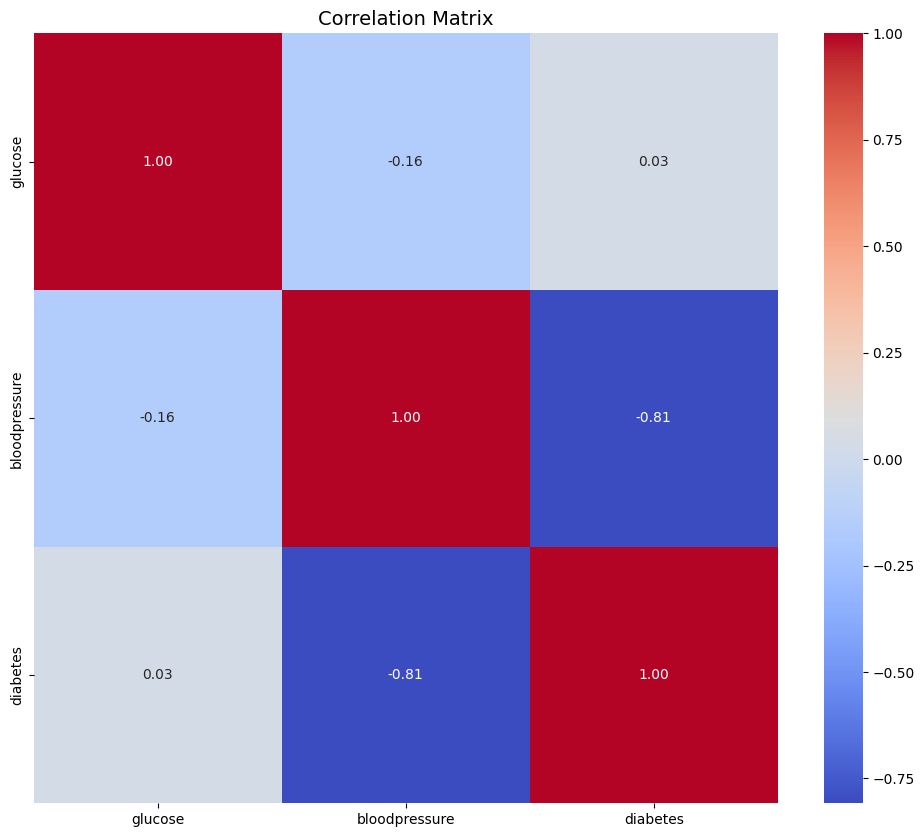

In [7]:
correlation_matrix = dt.corr()
import seaborn as sns
plt.figure(figsize=(12, 10))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)
plt.show()

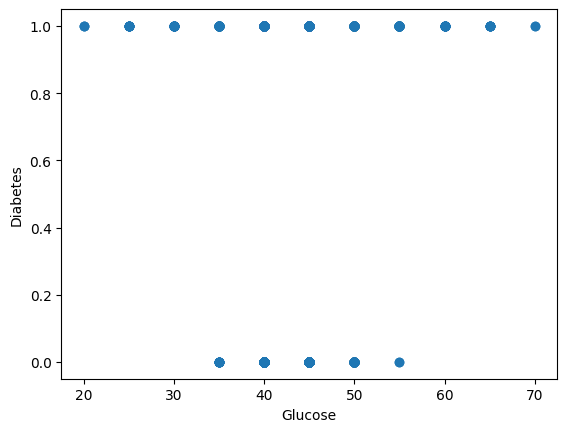

In [8]:
plt.scatter(dt['glucose'],dt['diabetes'])
plt.xlabel('Glucose')
plt.ylabel('Diabetes')
plt.show()

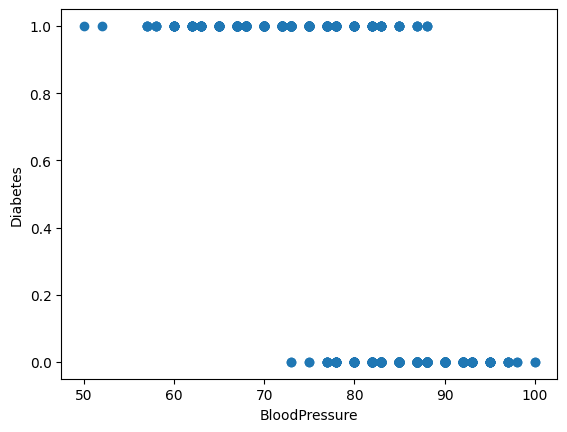

In [9]:
plt.scatter(dt['bloodpressure'],dt['diabetes'])
plt.xlabel('BloodPressure')
plt.ylabel('Diabetes')
plt.show()

In [10]:
from sklearn.preprocessing import PowerTransformer
x=dt.iloc[:,:-1]
y=dt.iloc[:,-1]
pt=PowerTransformer()
X=pt.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_train,y_train)
y_pred=nb.predict(x_test)

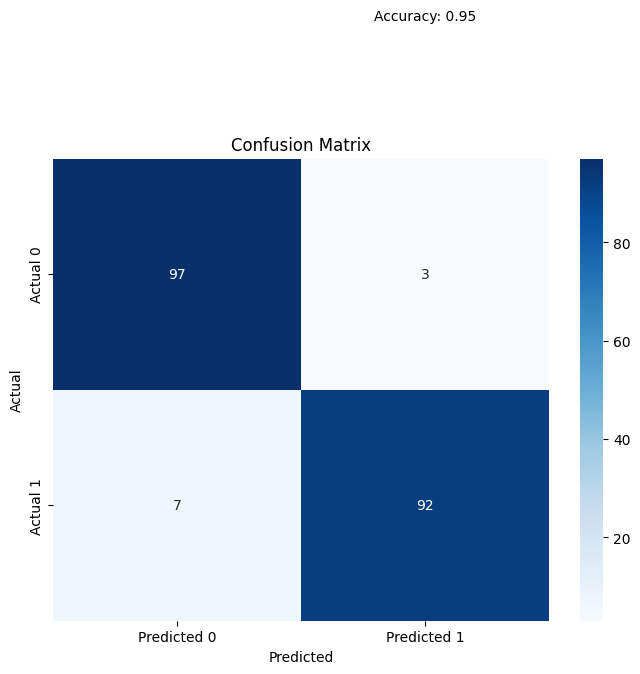

In [15]:
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the accuracy on the plot
accuracy = accuracy_score(y_test, y_pred)
plt.text(1.5, -0.6, f'Accuracy: {accuracy:.2f}', ha='center')

plt.show()